## Кластерный анализ

Необходимо провести кластерный анализ предложенного набора данных при помощи:

-иерархической кластеризации;
- метода k средних;
- методов, реализованных вами и сокурсниками.

Этапы работы
- Выполнить кластерный анализ.
- Отобрать необходимые переменные.
- Выполнить стандартизацию (если это нужно).

- Визуализировать результаты при помощи дендрограммы  и многомерного шкалирования 
- Определить число кластеров.
- Построить график "каменистая осыпь" ("локоть").
- Обосновать свой выбор, проверив другие варианты.
- Рассчитать критерии качества 

- Интерпретировать результаты кластерного анализа: что представляют собой полученные кластеры? чем объекты в каждом из получившихся кластеров похожи друг на друга? чем объекты из разных кластеров отличаются друг от друга?
 Сравнить результаты , полученные различными методами.
-  Сделать выводы 


- (пока не нужно)Разделить выборку на части. На тестовой выборке получить кластеризацию и добавить таргет-переменную, полученную в результате кластерного анализа. Запустить модель обучения, классифицирующая объекты и проверить предсказания на тестовой выборке.


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [2]:
data = pd.read_csv('housing.csv',sep=';', header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
data.head()

FileNotFoundError: [Errno 2] File b'housing.csv' does not exist: b'housing.csv'

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
y = data['MEDV']
X = data[['ZN', 'RM', 'LSTAT']]

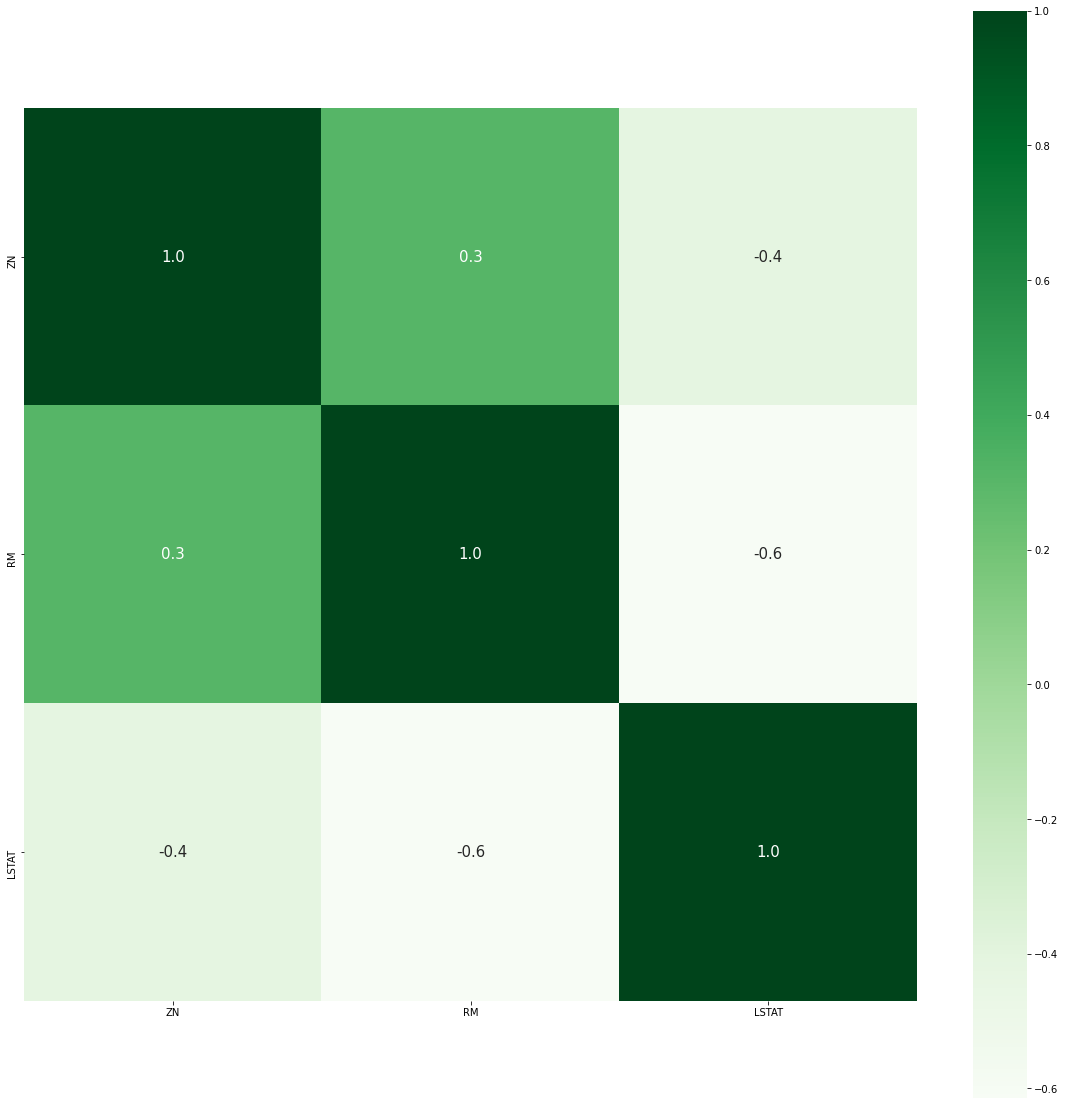

In [ ]:
corr = X.corr()
# ZN RM DIS? TAX? LSTAT
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scaled_df = pd.DataFrame(std_scaler.fit_transform(data), columns=data.columns)

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

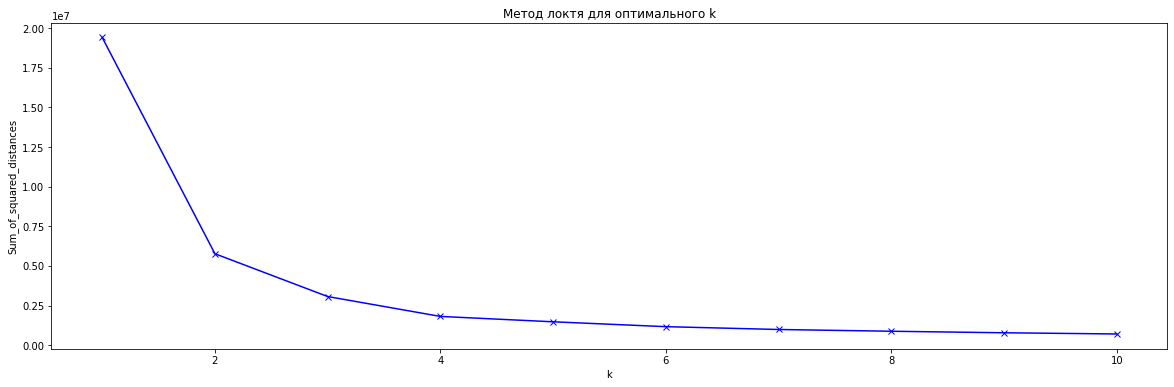

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Sum_of_squared_distances') 
plt.title('Метод локтя для оптимального k') 
plt.show()

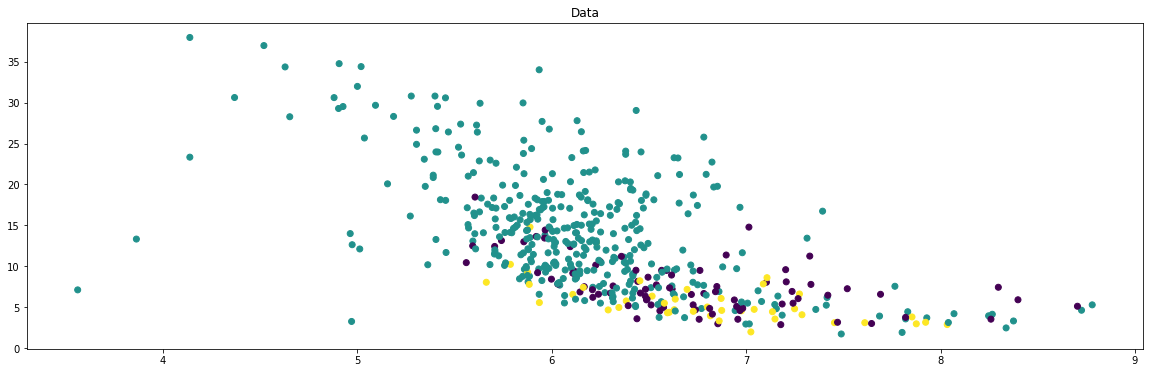

<Figure size 720x432 with 0 Axes>

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,algorithm='elkan')
km_pred = kmeans.fit_predict(X)

plt.scatter(data['RM'], data['LSTAT'], c = kmeans.labels_)
plt.title('Data')
plt.figure(figsize=(10,6))
plt.show()

In [ ]:
print("K-Means")
km_silhouette = silhouette_score(X,km_pred)
print("Silhouette score ", km_silhouette)
    
km_db = davies_bouldin_score(X,km_pred)
print("Davies Bouldin score ", km_db)

K-Means
Silhouette score  0.6902742257560383
Davies Bouldin score  0.4562172517175372


In [ ]:
X['Cluster'] = km_pred
data['Cluster'] = X['Cluster']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


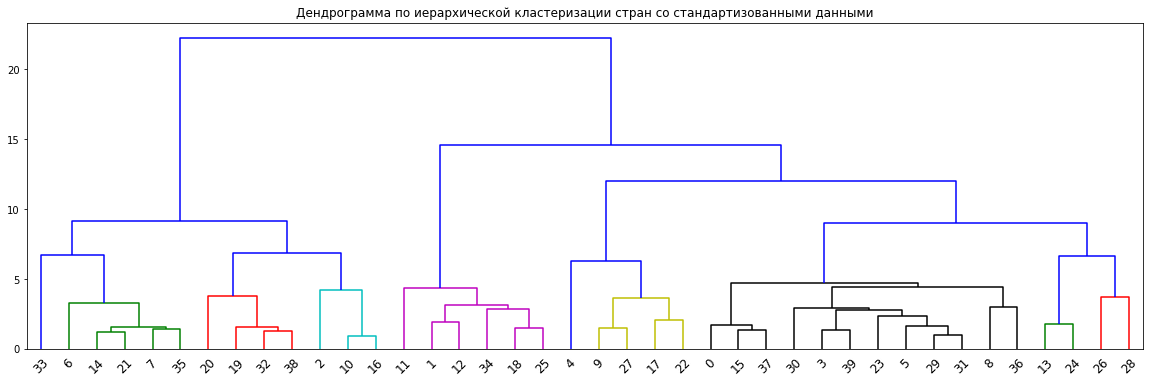

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

dataStdHC = linkage(scaled_df.sample(40), method = 'ward', metric = 'euclidean')
dn = dendrogram(dataStdHC, leaf_font_size = 12, color_threshold = 5.5)
plt.title('Дендрограмма по иерархической кластеризации со стандартизованными данными')
plt.rcParams["figure.figsize"] = (20,6)
plt.show()

In [ ]:
data.groupby('Cluster').mean()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Aggl_predict
Cluster,,,,,,,,,,,,,,,
0,0.177805,28.292683,5.089146,0.073171,0.470104,6.698293,48.260976,5.451254,5.109756,284.670732,16.935366,390.058293,7.652805,28.396341,1.378049
1,4.744630,0.327225,13.379607,0.073298,0.588641,6.142613,77.399476,3.038333,11.201571,445.832461,18.985864,345.984843,14.482827,20.464398,2.578534
2,0.033669,78.690476,2.545000,0.023810,0.411100,6.768738,27.973810,7.443943,3.190476,307.547619,16.600000,388.715952,5.773333,29.897619,2.000000


In [ ]:
data.groupby('Cluster').mean()[['ZN', 'RM', 'LSTAT']]

,ZN,RM,LSTAT
Cluster,,,
0,28.292683,6.698293,7.652805
1,0.327225,6.142613,14.482827
2,78.690476,6.768738,5.773333


In [ ]:
data.groupby('Cluster').count()['MEDV']

Cluster
0     82
1    382
2     42
Name: MEDV, dtype: int64

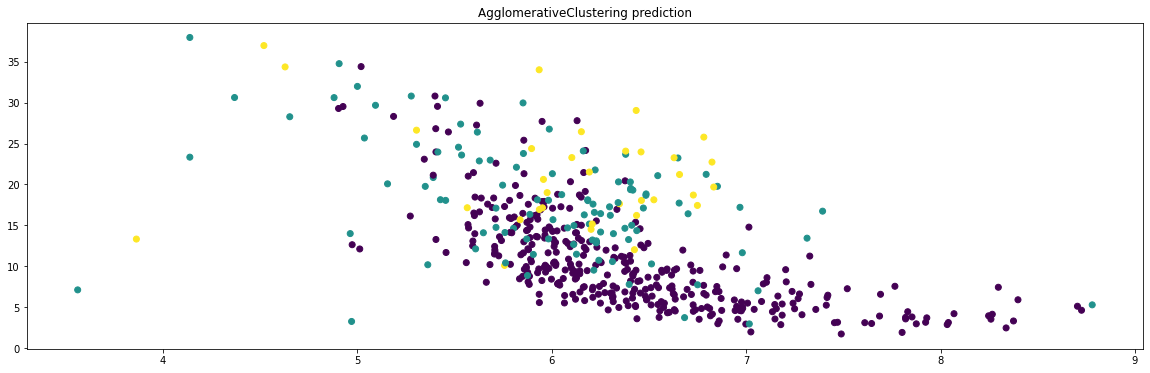

<Figure size 576x432 with 0 Axes>

In [ ]:
from sklearn.cluster import AgglomerativeClustering

aggl = AgglomerativeClustering(n_clusters=3)
data['Aggl_predict'] = aggl.fit_predict(data)
plt.scatter(data['RM'], data['LSTAT'], c = aggl.labels_)
plt.title('AgglomerativeClustering prediction')
plt.figure(figsize=(8,6))
plt.show()

In [ ]:
print("AgglomerativeClustering")
km_silhouette = silhouette_score(data,data['Aggl_predict'])
print("Silhouette score ", km_silhouette)
    
km_db = davies_bouldin_score(data,data['Aggl_predict'])
print("Davies Bouldin score ", km_db)

AgglomerativeClustering
Silhouette score  0.7181228560200148
Davies Bouldin score  0.30014787411353444


In [ ]:
data.groupby('Aggl_predict').mean()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Cluster
Aggl_predict,,,,,,,,,,,,,,,
0,0.388774,15.582656,8.420894,0.073171,0.511847,6.388005,60.632249,4.441272,4.455285,311.926829,17.809214,381.042575,10.417453,24.857182,0.891599
1,11.115060,0.000000,18.563462,0.076923,0.669798,5.982673,90.107692,2.066592,23.038462,668.163462,20.195192,368.406154,17.913558,17.515385,1.000000
2,16.030876,0.000000,18.100000,0.000000,0.671061,6.080394,89.527273,2.016267,24.000000,666.000000,20.200000,47.215455,21.072727,12.354545,1.000000


In [ ]:
data.groupby('Aggl_predict').mean()[['ZN', 'RM', 'LSTAT']]

,ZN,RM,LSTAT
Aggl_predict,,,
0,15.582656,6.388005,10.417453
1,0.000000,5.982673,17.913558
2,0.000000,6.080394,21.072727


In [ ]:
data.groupby('Aggl_predict').count()['MEDV']

Aggl_predict
0    369
1    104
2     33
Name: MEDV, dtype: int64